#  <u>*Motor Insurance Analysis.*</u>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

---
---

## <u>*Importing data*</u>

In [74]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/data_car.csv")
df.drop("X_OBSTAT_",axis=1,inplace=True)
df["veh_value"]=df["veh_value"]*10000

In [75]:
df

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat
0,10600.0,0.303901,0,0,0.000000,HBACK,3,F,C,2
1,10300.0,0.648871,0,0,0.000000,HBACK,2,F,A,4
2,32600.0,0.569473,0,0,0.000000,UTE,2,F,E,2
3,41400.0,0.317591,0,0,0.000000,STNWG,2,F,D,2
4,7200.0,0.648871,0,0,0.000000,HBACK,4,F,C,2
...,...,...,...,...,...,...,...,...,...,...
67851,10700.0,0.654346,0,0,0.000000,SEDAN,2,M,A,6
67852,12300.0,0.908966,0,0,0.000000,SEDAN,4,M,C,3
67853,19300.0,0.312115,0,0,0.000000,STNWG,4,M,C,3
67854,9700.0,0.320329,1,1,7646.769989,HBACK,3,F,C,2


## <u>*Data shape*</u>

In [76]:
print(df.shape)
print("The data set has",df.shape[0],"rows, and",df.shape[1],"features")

(67856, 10)
The data set has 67856 rows, and 10 features


## <u>*Data types*</u>

In [77]:
df.dtypes

veh_value    float64
exposure     float64
clm            int64
numclaims      int64
claimcst0    float64
veh_body      object
veh_age        int64
gender        object
area          object
agecat         int64
dtype: object

## <u>*Data info*</u>

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 5.2+ MB


##  <u> *Data Cleaning and Preperation*  </u>

*Data with sum insured moire than 0 :*

In [82]:
df=df[df["veh_value"] != 0]

In [83]:
df.shape

(67803, 10)

### *A.* <u>*na-values :*</u>

In [84]:
print("The total number of na_values are :",df.isna().sum().sum())
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na_values are : 0

The number of na-values in each features are :


veh_value    0
exposure     0
clm          0
numclaims    0
claimcst0    0
veh_body     0
veh_age      0
gender       0
area         0
agecat       0
dtype: int64

### *B.* <u>*Outliers :*</u>

In [85]:
import numpy as np
import scipy.stats as stats
threshold = np.percentile(df["claimcst0"], 95)
excesses = df["claimcst0"][df["claimcst0"] > threshold] - threshold
shape, loc, scale = stats.genpareto.fit(excesses)
extreme_values = stats.genpareto.ppf(0.99, shape, loc=loc, scale=scale) + threshold
claimcst0_outliers = df["claimcst0"][df["claimcst0"] > extreme_values]
df=df[df["claimcst0"].isin(list(claimcst0_outliers.values)) == False]


In [86]:
threshold = np.percentile(df["veh_value"], 95)
excesses = df["veh_value"][df["veh_value"] > threshold] - threshold
shape, loc, scale = stats.genpareto.fit(excesses)
extreme_values = stats.genpareto.ppf(0.99, shape, loc=loc, scale=scale) + threshold
veh_value_outliers = df["veh_value"][df["veh_value"] > extreme_values]
df=df[df["veh_value"].isin(list(veh_value_outliers.values)) == False]

### *C.* <u>*Data Types Conversion :*</u>

In [87]:
df["numclaims"]=df["numclaims"].astype("object")
df["clm"]=df["clm"].astype("object")
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")

In [88]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [89]:
print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 3 numerical features : ['veh_value', 'exposure', 'claimcst0']

we have 7 categorical features : ['clm', 'numclaims', 'veh_body', 'veh_age', 'gender', 'area', 'agecat']


---

## *Descrirptive statistics*

### *A.* <u>*Basic data statistics:*</u>

* #### *Numerical data statistics :*

In [90]:
df.describe()

,veh_value,exposure,claimcst0
count,67741.000000,67741.000000,67741.000000
mean,17676.956821,0.468535,132.366757
std,11397.103142,0.289906,959.567174
min,1800.000000,0.002738,0.000000
25%,10100.000000,0.219028,0.000000
50%,15000.000000,0.446270,0.000000
75%,21500.000000,0.709103,0.000000
max,112400.000000,0.999316,31243.669922


* #### *Categorical data statistics :*

In [91]:
df.describe(include="object")

,clm,numclaims,veh_body,veh_age,gender,area,agecat
count,67741,67741,67741,67741,67741,67741,67741
unique,2,5,13,4,2,6,6
top,0,0,SEDAN,3,F,C,4
freq,63133,63133,22201,20058,38561,20516,16168


---

### *B.* <u>*EDA - Data Visualization:*</u>

* ####  <u> *Numerical features Visualization :*  </u>

In [92]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features,ChartType):
    nrows = 1
    ncols = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,5))
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind=f"{ChartType}")

    plt.tight_layout()
    plt.show()

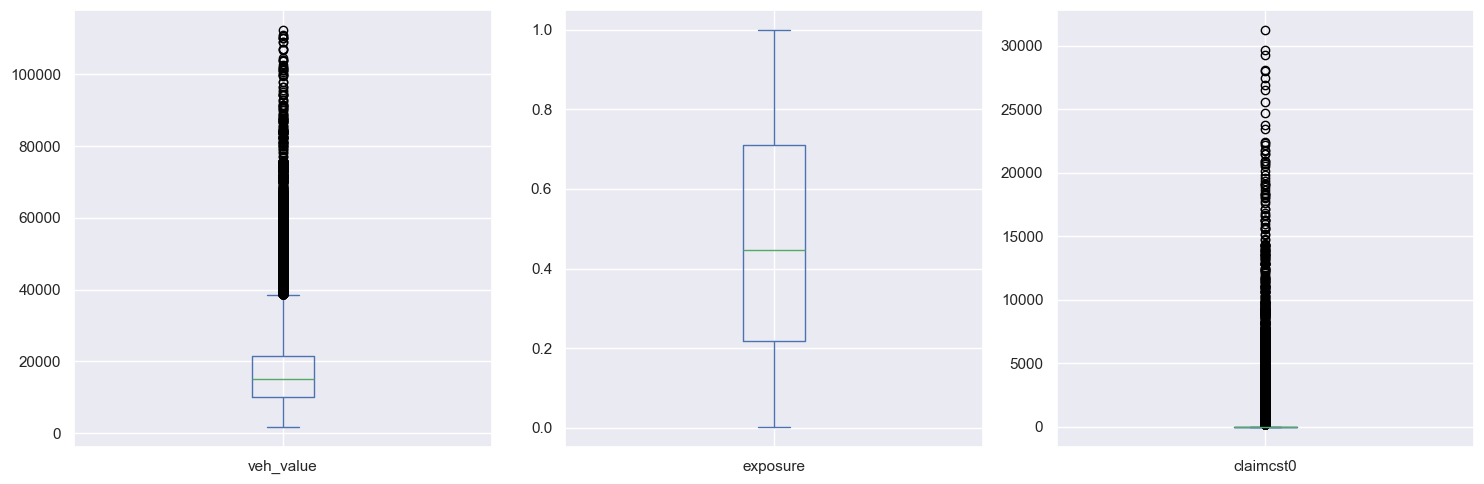

In [93]:
plot_numerical_features(numerical_features,"box")

* ####  <u> *Categorical features Visualization :*  </u>

In [94]:
# creating one function for plotting categorical_features
def plot_categorical_features(categorical_features):
    nrows = 3
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax, title=column)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        
    plt.tight_layout()
    plt.show()

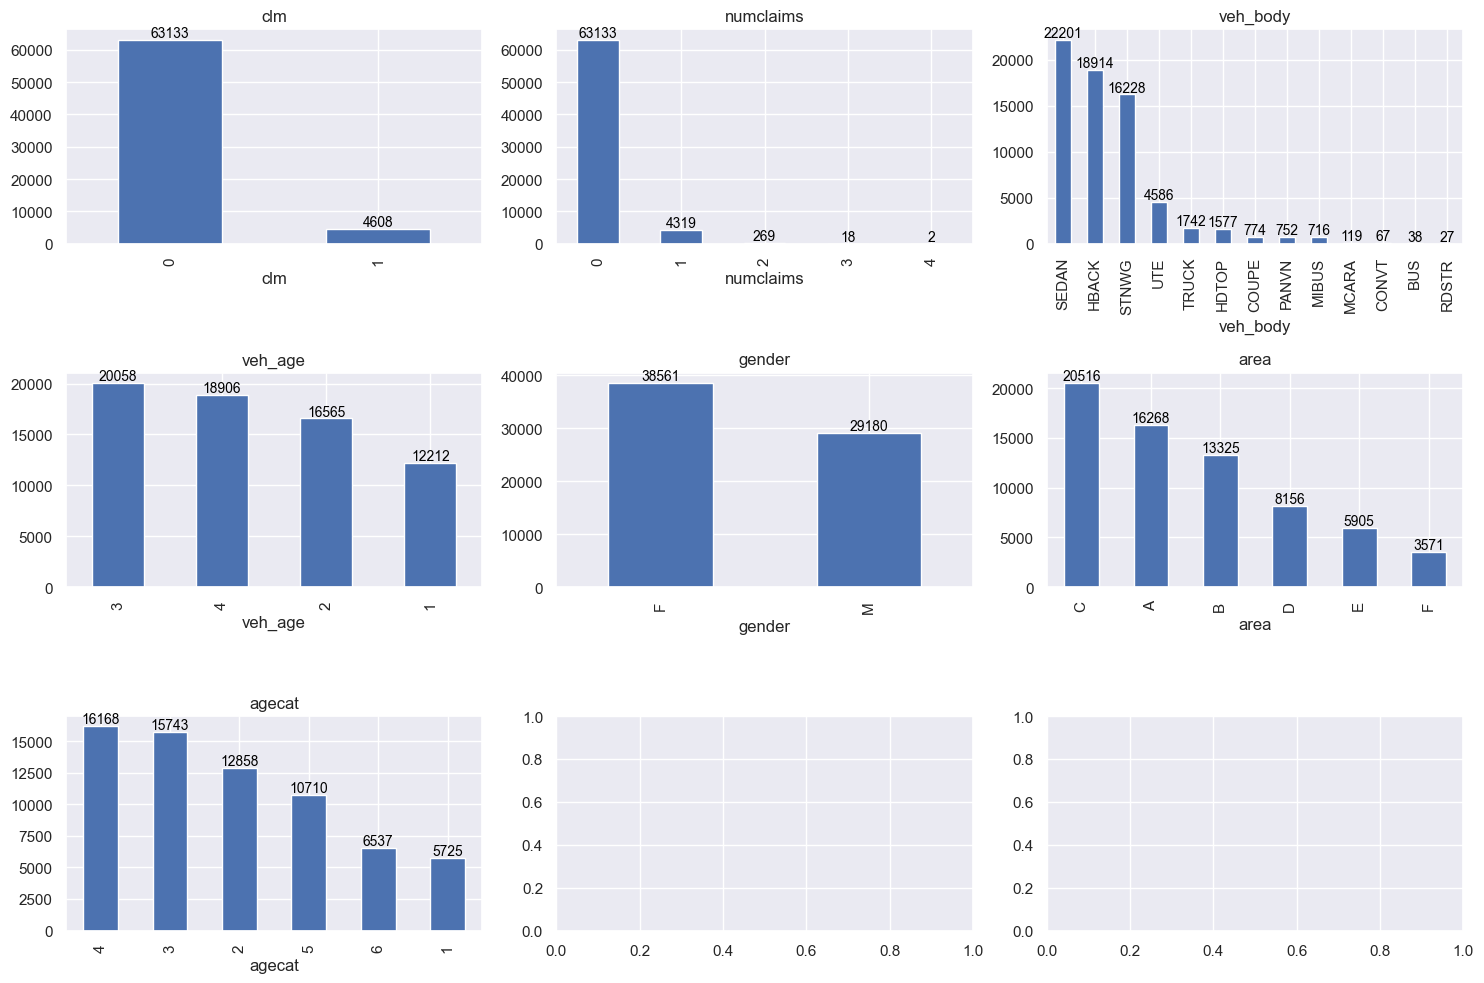

In [95]:
plot_categorical_features(categorical_features)

---

### *C.* <u>*EDA Correlation*</u>

<Axes: >

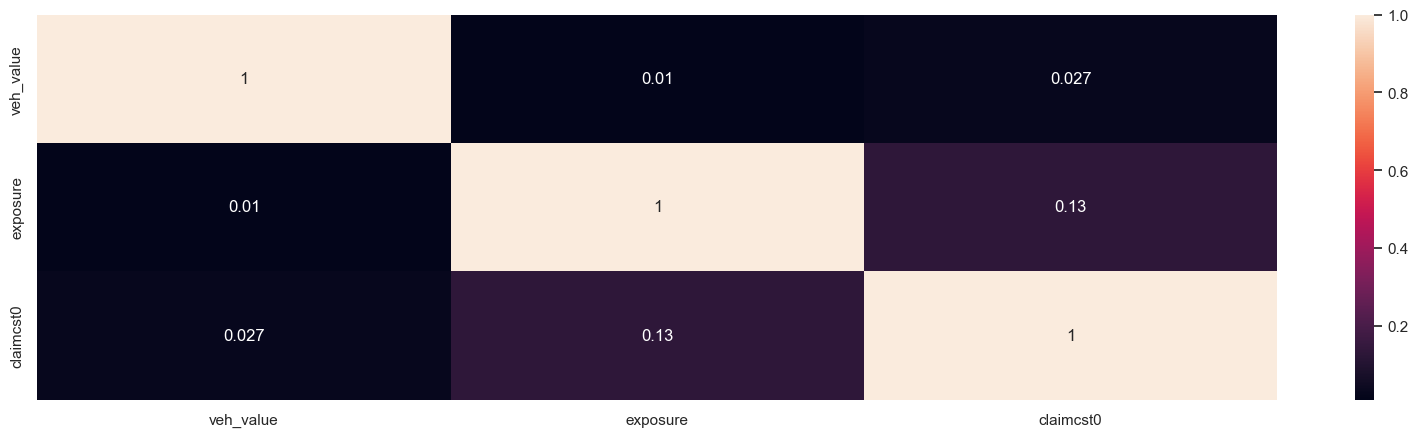

In [96]:
plt.subplots(figsize=(20,5))
sns.heatmap(numerical_features.corr(method="spearman"),annot=True)

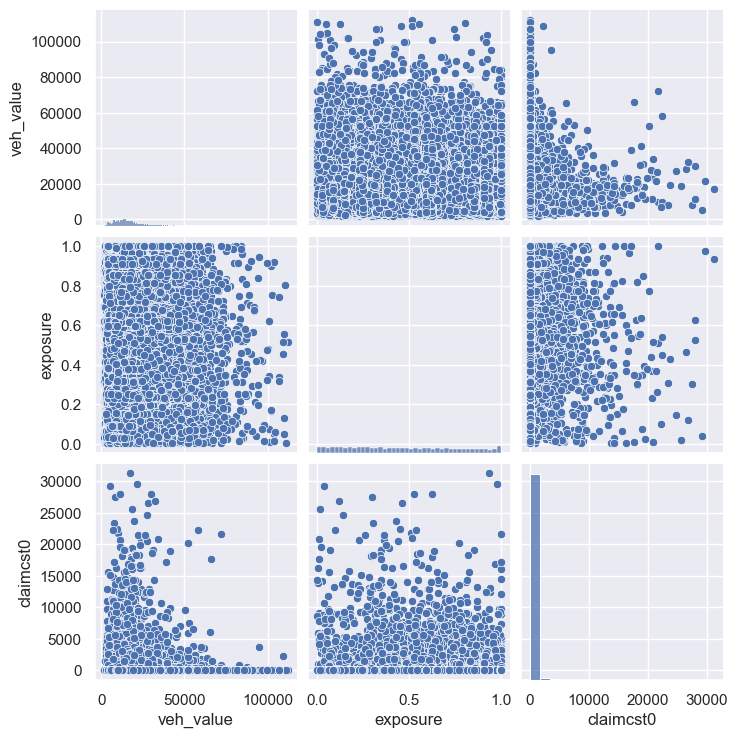

In [97]:
sns.pairplot(numerical_features);

---

## *D. EDA - Data with Positive Claims*

*Creating one function to get all needed data*

In [98]:
def summary(feature):
    TotalClaimsCount=pd.DataFrame(df.groupby(f"{feature}")["numclaims"].sum())
    Totalexposure=pd.DataFrame(round(df.groupby(f"{feature}")["exposure"].sum()))
    TotalClaims=pd.DataFrame(round(df.groupby(f"{feature}")["claimcst0"].sum()))
    Frequency=pd.DataFrame(TotalClaimsCount["numclaims"]/Totalexposure["exposure"],columns=["Frequency"])
    severity=pd.DataFrame(TotalClaims["claimcst0"]/TotalClaimsCount["numclaims"],columns=["severity"])
    Risk_Premium=pd.DataFrame(round(TotalClaims["claimcst0"]/Totalexposure["exposure"]),columns=["Risk_Premium"])
  
    
    return pd.concat([TotalClaimsCount, Totalexposure, TotalClaims,Frequency,severity,Risk_Premium],axis=1)

* *Gender_Summary*

In [99]:
gender_Summary=summary('gender')
gender_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
gender,,,,,,
F,2826,17931.0,4810996.0,0.157604,1702.404812,268.0
M,2093,13808.0,4155661.0,0.151579,1985.504539,301.0


* *Veh_body_Summary*

In [100]:
veh_body_Summary=summary('veh_body')
veh_body_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
veh_body,,,,,,
BUS,8,19.0,11839.0,0.421053,1479.875,623.0
CONVT,3,27.0,6889.0,0.111111,2296.333333,255.0
COUPE,75,318.0,187723.0,0.235849,2502.973333,590.0
HBACK,1329,8810.0,2541840.0,0.150851,1912.595937,289.0
HDTOP,134,783.0,230022.0,0.171137,1716.58209,294.0
MCARA,15,56.0,10674.0,0.267857,711.6,191.0
MIBUS,45,317.0,116105.0,0.141956,2580.111111,366.0
PANVN,68,409.0,133113.0,0.166259,1957.544118,325.0
RDSTR,3,12.0,1369.0,0.25,456.333333,114.0


* *Veh_age_Summary*

In [101]:
veh_age_Summary=summary('veh_age')
veh_age_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
veh_age,,,,,,
1,872,5320.0,1412586.0,0.16391,1619.938073,266.0
2,1348,7914.0,2319082.0,0.170331,1720.38724,293.0
3,1446,9539.0,2718237.0,0.151588,1879.83195,285.0
4,1253,8967.0,2516751.0,0.139735,2008.580208,281.0


* *Area_Summary*

In [102]:
area_Summary=summary('area')
area_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
area,,,,,,
A,1176,7577.0,1953821.0,0.155207,1661.412415,258.0
B,1017,6286.0,1759226.0,0.161788,1729.819076,280.0
C,1491,9565.0,2853147.0,0.155881,1913.579477,298.0
D,523,3811.0,910531.0,0.137234,1740.977055,239.0
E,411,2768.0,836136.0,0.148483,2034.394161,302.0
F,301,1733.0,653795.0,0.173687,2172.076412,377.0


* *Agecat_Summary*

In [103]:
agecat_Summary=summary('agecat')
agecat_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
agecat,,,,,,
1,522,2604.0,1226657.0,0.200461,2349.917625,471.0
2,995,5883.0,1857380.0,0.169131,1866.713568,316.0
3,1184,7397.0,2086457.0,0.160065,1762.210304,282.0
4,1183,7607.0,2065811.0,0.155515,1746.247675,272.0
5,646,5156.0,1047274.0,0.125291,1621.167183,203.0
6,389,3094.0,683078.0,0.125727,1755.984576,221.0


---

### *A.* <u>*Apply mutual_info_regression*</u>

In [104]:
df2=df[['veh_value', 'claimcst0', 'veh_body','veh_age', 'gender', 'area', 'agecat']]

* ####  <u>  <u>*Create mutual_info_regression Function :*</u>

In [105]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [106]:
X_1 = df2.copy()
y_1= X_1.pop("claimcst0")
# Label encoding for categoricals
for colname in X_1.select_dtypes("object"):
    X_1[colname], _ = X_1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_1 = X_1.dtypes == int

In [107]:
mi_scores_1 = make_mi_scores(X_1, y_1, discrete_features_1)
print(f"\n Faetures Importance for claimcst0 Feature:\n {mi_scores_1}")  # show a few features with their MI scores


 Faetures Importance for claimcst0 Feature:
 area         0.010615
veh_body     0.006131
veh_age      0.005335
agecat       0.003391
veh_value    0.001929
gender       0.000000
Name: MI Scores, dtype: float64


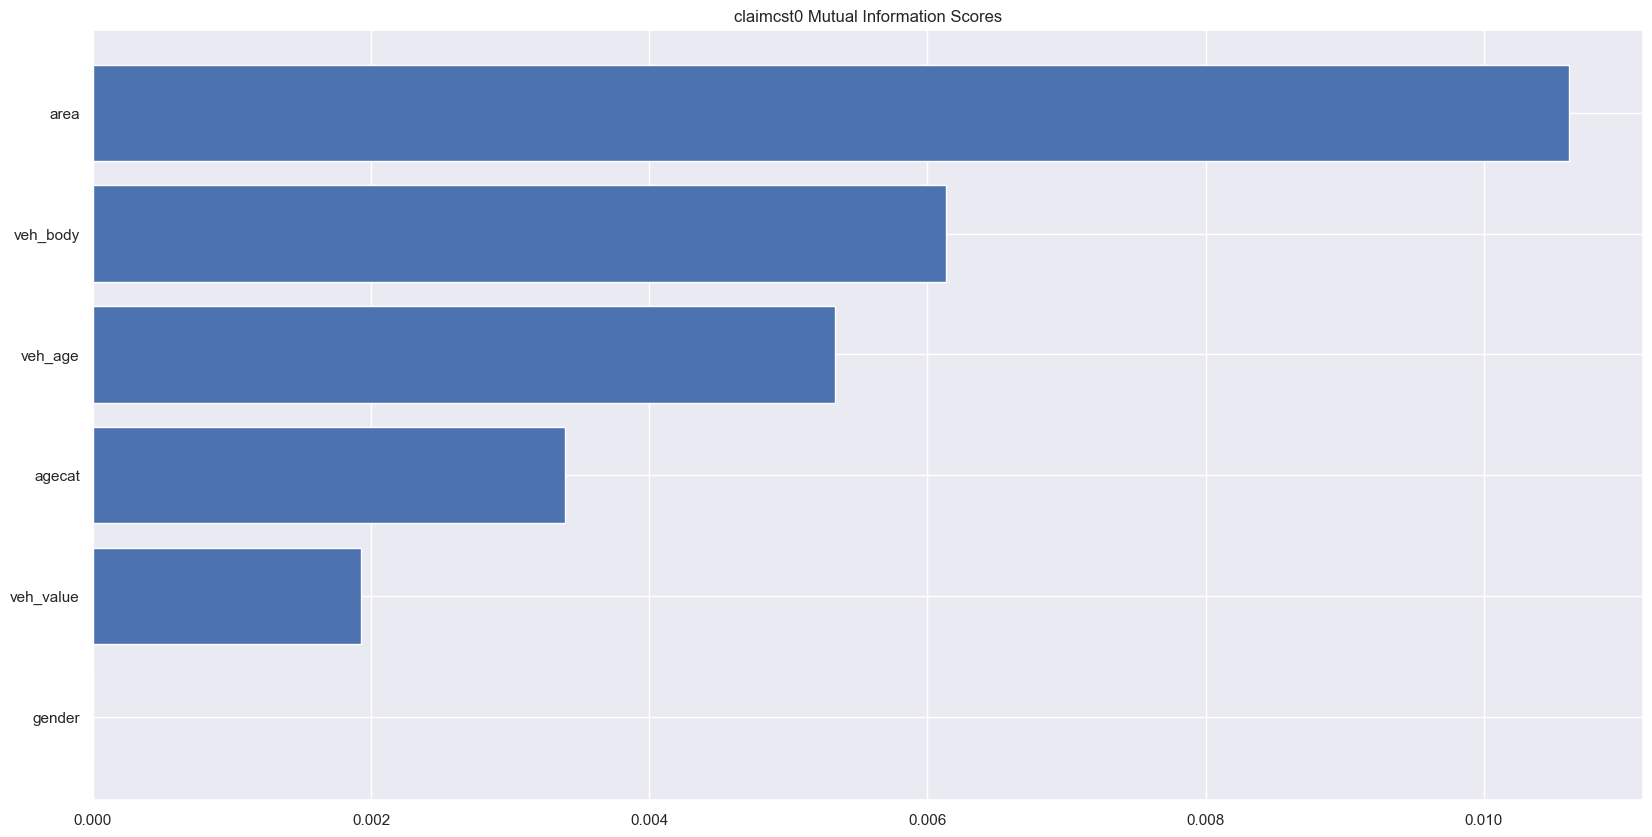

In [108]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

plot_mi_scores(mi_scores_1)
plt.title("claimcst0 Mutual Information Scores");